In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.ndimage import maximum_filter
from spectrogramtools import *
import scipy.io as sio
from scipy.spatial import KDTree
import librosa

In [2]:
x_audio, sr = librosa.load("Despacito.avi")
ipd.Audio(x_audio, rate=sr)

/home/ctralie/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


22050


<IPython.core.display.Javascript object>


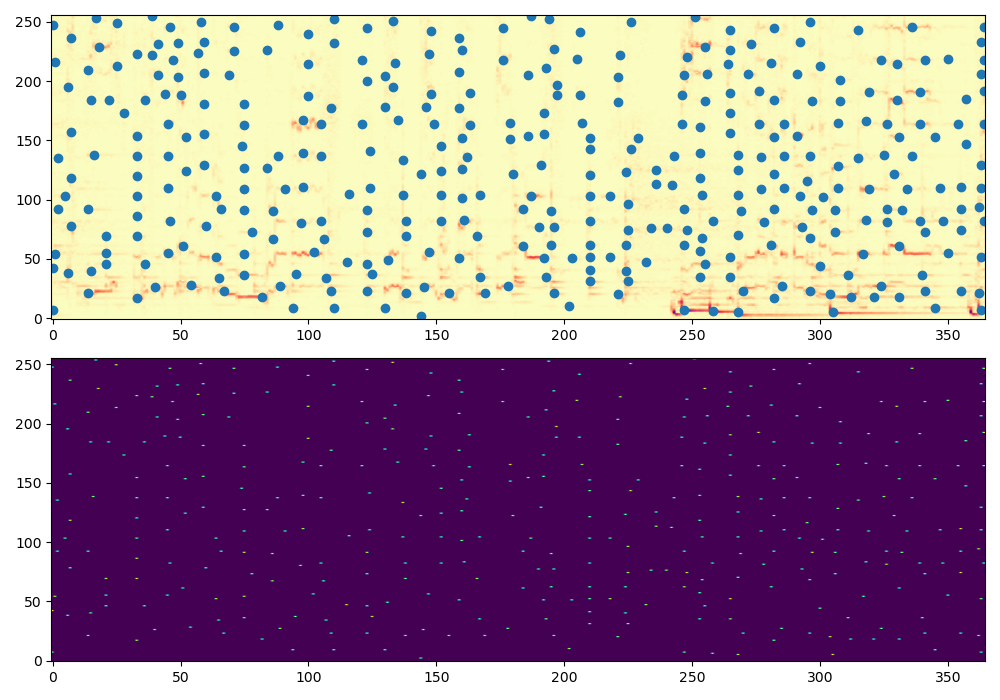

In [3]:
print(sr)
win_length = 2048
hop_length = 1024
max_freq = 256
S = STFT(x_audio, win_length, hop_length, useLibrosa=False)
S = np.abs(S)
orig_shape = S.shape[0]
S = S[0:max_freq, :]

time_win = 8
freq_win = 5

Maxes = maximum_filter(S, size=(time_win*2+1, freq_win*2+1))
SM = S == Maxes
x, y = np.meshgrid(np.arange(SM.shape[1]), np.arange(SM.shape[0]))
x = x[SM == 1]
y = y[SM == 1]
X = np.array([x, y]).T

plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.imshow(S, aspect='auto', cmap='magma_r')
plt.scatter(x, y)
plt.gca().invert_yaxis()
plt.subplot(212)
plt.imshow(SM, aspect='auto')
plt.gca().invert_yaxis()
plt.tight_layout()
#"""


In [4]:
y = np.zeros(x_audio.size)
coeff = hann_window(win_length)
for [i, j] in X:
    i_start = hop_length*i
    freq = j*sr/win_length
    t = np.arange(win_length)/sr
    y[i_start:i_start+win_length] += coeff*np.cos(2*np.pi*freq*t)

In [5]:
S = STFT(y, win_length, hop_length, useLibrosa=False)
S = np.abs(S)
orig_shape = S.shape[0]
S = S[0:max_freq, :]
plt.figure(figsize=(10, 2))
plt.imshow(S, aspect='auto')

<IPython.core.display.Javascript object>

In [6]:
ipd.Audio(y, rate=sr)